In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import os
#import PIL
import tensorflow as tf

#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
# dataset_dir = "assets/optionB"
dataset_dir = "assets/optionB_mixed/ready"
data_dir = pathlib.Path(dataset_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

7327


In [4]:
batch_size = 32
img_height = 128
img_width = 128

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7327 files belonging to 2 classes.
Using 5862 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7327 files belonging to 2 classes.
Using 1465 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Defected', 'Normal']


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [69]:
# I train with 15 epochs. Takes 4 sec for an epoch => 1 min total time
# but five epochs are also fine for testing.
epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

184/184 [==============================] - 23s 125ms/step - loss: 5.2322e-05 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9945


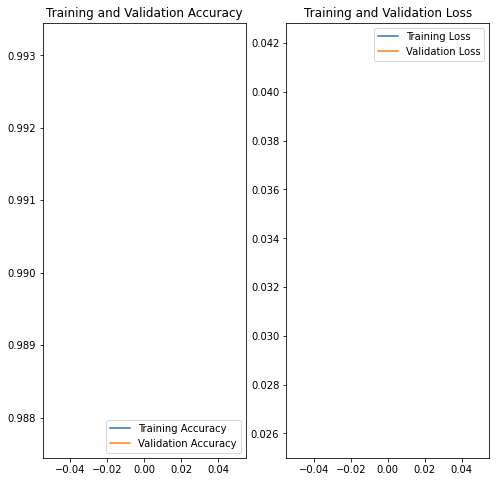

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:



#image_name = "358.jpg"
#image_path = "assets/optionB/3up_abnormal/"

# images from a custom Validation folder
image_path = "assets/Validate/"
# image_path = "assets/optionB/5_abnormal/"
# image_path = "assets/optionB_mixed/ready/Defected/"
outstanding = []
# it will stop with an error at the last file
# for i in range(3019,3353):
for i in range(10):
    try:
        # image_name = f"Image{i}.jpg"
        image_name = f"ab_{i}.jpg"
        # image_name = f"friday{i}.jpg"

        img = tf.keras.utils.load_img(
        image_path + image_name, target_size=(img_height, img_width)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        ###
        if class_names[np.argmax(score)] == 'Normal':
            print(f'{image_name} is outstanding')
            outstanding.append(image_name)
        ###
        print(
        "image {} most likely belongs to {} with a {:.2f} percent confidence."
        .format(i, class_names[np.argmax(score)], 100 * np.max(score)))
    
    except FileNotFoundError:
        print('end of files of file is missing')
print('finished')
    #print(score)
    
    # if scores for classification are not high, uncomment below to see what classes are confusing for the model
    # code below does nothing useful if you have only 2 classes, keep it commented
    
    # plt.figure(figsize=(8, 8))
    # plt.scatter(score*100, class_names)
    # plt.title(f'Probability classes for image {i}')
    # plt.xlabel('probability, %');

ab_0.jpg is outstanding
image 0 most likely belongs to Normal with a 100.00 percent confidence.
image 1 most likely belongs to Defected with a 100.00 percent confidence.
image 2 most likely belongs to Defected with a 98.86 percent confidence.
image 3 most likely belongs to Defected with a 100.00 percent confidence.
ab_4.jpg is outstanding
image 4 most likely belongs to Normal with a 97.91 percent confidence.
image 5 most likely belongs to Defected with a 100.00 percent confidence.
image 6 most likely belongs to Defected with a 100.00 percent confidence.
ab_7.jpg is outstanding
image 7 most likely belongs to Normal with a 68.55 percent confidence.
image 8 most likely belongs to Defected with a 100.00 percent confidence.
image 9 most likely belongs to Defected with a 100.00 percent confidence.
finished


In [71]:
outstanding

['friday3020.jpg',
 'friday3058.jpg',
 'friday3069.jpg',
 'friday3147.jpg',
 'friday3180.jpg',
 'friday3183.jpg']

friday3020.jpg is outstanding
friday3069.jpg is outstanding
friday3147.jpg is outstanding
friday3180.jpg is outstanding
friday3183.jpg is outstanding


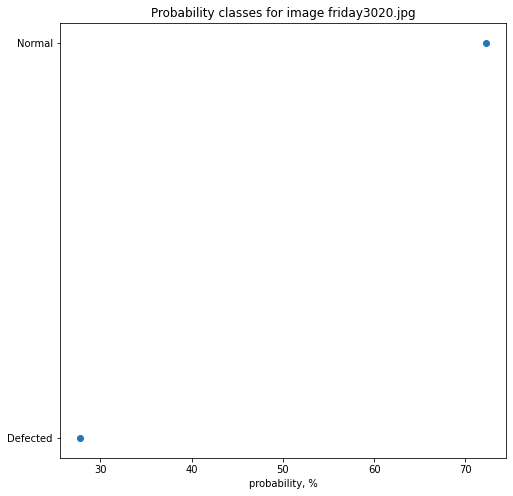

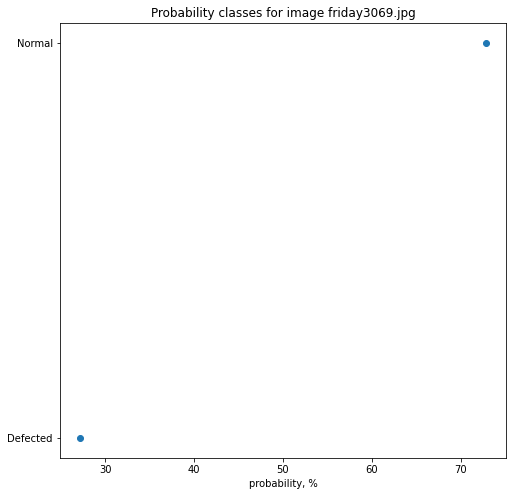

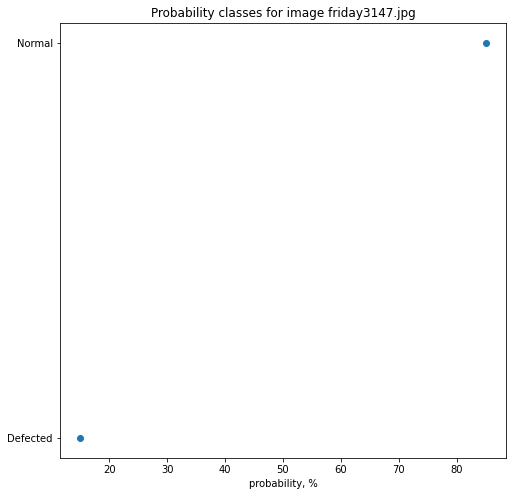

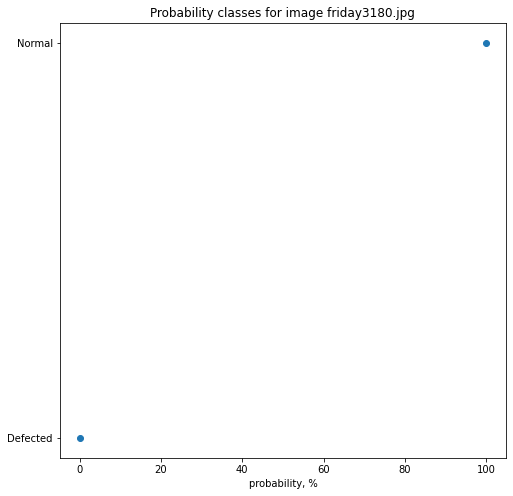

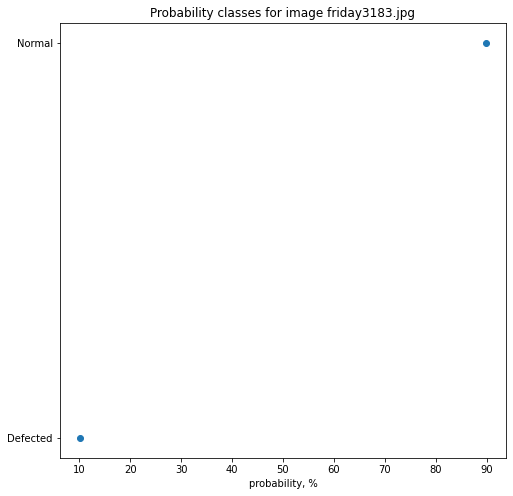

In [67]:
image_path = "assets/optionB_mixed/ready/Defected/"
for i in outstanding:
        image_name = i

        img = tf.keras.utils.load_img(
        image_path + image_name, target_size=(img_height, img_width)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        ###
        if class_names[np.argmax(score)] == 'Normal':
            print(f'{image_name} is outstanding')
            # outstanding.append(image_name)
        ###
        # print(
        # "image {} most likely belongs to {} with a {:.2f} percent confidence."
        # .format(i, class_names[np.argmax(score)], 100 * np.max(score)))
    
        plt.figure(figsize=(8, 8))
        plt.scatter(score*100, class_names)
        plt.title(f'Probability classes for image {i}')
        plt.xlabel('probability, %');